<a href="https://colab.research.google.com/github/kien1711/MONEY_VIET_NAM/blob/main/money.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

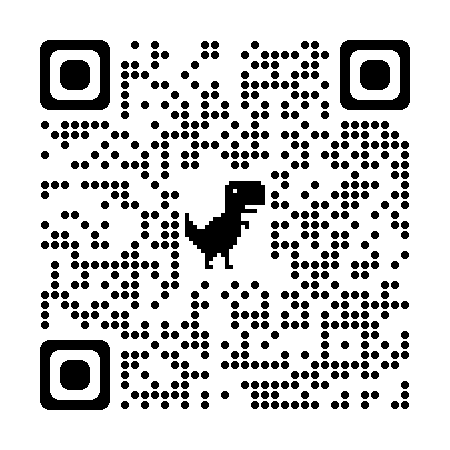

In [ ]:
link data
https://drive.google.com/drive/folders/1U8lhIYGCzVECKTePqLIKwiaW-n4J-IuI?usp=sharing

In [ ]:
# khai báo thư viện
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, BatchNormalization, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import Adam,SGD
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf

from keras.models import load_model
import numpy as np
from keras.preprocessing.image import load_img,img_to_array

In [ ]:
# khai báo một số biến và đường dẫn
trainning = '../content/drive/MyDrive/tri_tue_nhan_tao/money/train'
test = '..//content/drive/MyDrive/tri_tue_nhan_tao/money/test'
seed = 10
BATCH_SIZE = 16

In [ ]:
# mở rộng thêm lượng data bằng cách dùng ImageDataGenerator
data_generator = ImageDataGenerator(
        validation_split=0.2,
        rotation_range=20,
        width_shift_range=0.2,
        height_shift_range=0.2,
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest')

val_data_generator = ImageDataGenerator(rescale=1./255, validation_split=0.2)

test_generator = ImageDataGenerator(rescale=1./255)

In [ ]:
# Genera/tor data train

train_generator = data_generator.flow_from_directory(trainning, target_size=(150,150), shuffle=True, seed=seed,  # target_size: resize ảnh đầu ra
                                            class_mode='categorical', batch_size=BATCH_SIZE, subset="training")  # shuffle=True: sắp xếp dữ liệu theo chữ và số

# Generator data validation
validation_generator = val_data_generator.flow_from_directory(trainning, target_size=(150,150), shuffle=False, seed=seed,
                                                     class_mode='categorical', batch_size=BATCH_SIZE, subset="validation")

# Generator data test
test_generator = test_generator.flow_from_directory(test, target_size=(150,150), shuffle=False, seed=seed,
                                                     class_mode='categorical', batch_size=1) #batch_size = 1 để test từng ảnh 1

nb_train_samples = train_generator.samples
nb_validation_samples = validation_generator.samples
nb_test_samples = test_generator.samples
classes = list(train_generator.class_indices.keys())
print('Classes: '+str(classes))
num_classes  = len(classes)

Found 390 images belonging to 11 classes.
Found 92 images belonging to 11 classes.
Found 145 images belonging to 11 classes.
Classes: ['100k', '10k', '1k', '200', '200k', '20k', '2k', '500', '500k', '50k', '5k']


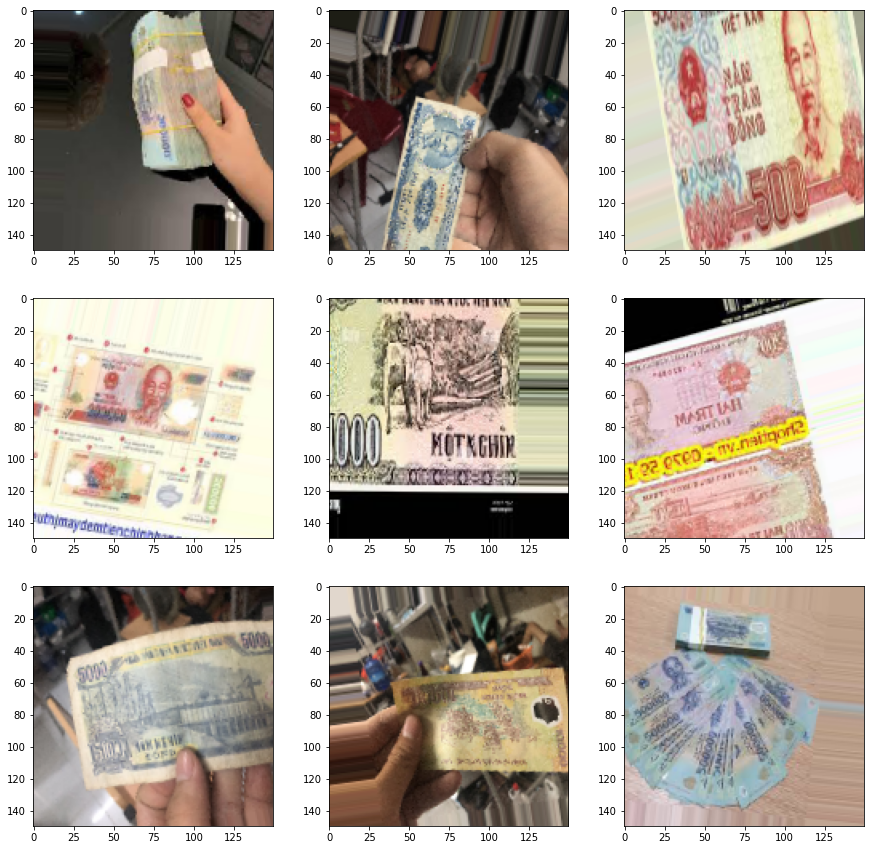

In [ ]:
plt.figure(figsize=(15,15))
for i in range(9):
    
    plt.subplot(330 + 1 + i)
    batch = train_generator.next()[0]*255
    image = batch[0].astype('uint8')
    plt.imshow(image)
plt.show()

In [ ]:
model = Sequential()
# input layer
model.add(Conv2D(32,(3,3),activation='relu', 
                 kernel_initializer='he_uniform',
                 padding = 'same', input_shape=(150,150,3))) 
# hidden layer
model.add(Conv2D(64,(3,3),activation='relu', 
                 kernel_initializer='he_uniform',
                 padding = 'same')) 
model.add(MaxPooling2D(pool_size=(2, 2))) 

# output layer
model.add(Flatten())
model.add(Dense(128,activation='relu',
                kernel_initializer='he_uniform'))

model.add(Dropout(0.2))
model.add(Dense(11,activation='softmax'))

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 150, 150, 32)      896       
                                                                 
 conv2d_5 (Conv2D)           (None, 150, 150, 64)      18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 75, 75, 64)       0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 360000)            0         
                                                                 
 dense_4 (Dense)             (None, 128)               46080128  
                                                                 
 dropout_2 (Dropout)         (None, 128)               0         
                                                      

In [ ]:
# Compile model
opt=SGD(lr=0.001, momentum=0.9)   # lr toc do hoc
model.compile(optimizer=opt,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


In [ ]:
#Training
history = model.fit(train_generator,epochs=100,
                    batch_size=64,
                    validation_data=validation_generator,
                    verbose=1)

Epoch 1/100
25/25 [==============================] - 93s 4s/step - loss: 3.2275 - accuracy: 0.1410 - val_loss: 2.2639 - val_accuracy: 0.2283
Epoch 2/100
25/25 [==============================] - 13s 512ms/step - loss: 2.2400 - accuracy: 0.2103 - val_loss: 2.2852 - val_accuracy: 0.2609
Epoch 3/100
25/25 [==============================] - 13s 514ms/step - loss: 2.1931 - accuracy: 0.2333 - val_loss: 2.2348 - val_accuracy: 0.2935
Epoch 4/100
25/25 [==============================] - 13s 524ms/step - loss: 2.1564 - accuracy: 0.2308 - val_loss: 2.1661 - val_accuracy: 0.3261
Epoch 5/100
25/25 [==============================] - 13s 514ms/step - loss: 2.1308 - accuracy: 0.2436 - val_loss: 2.1200 - val_accuracy: 0.2935
Epoch 6/100
25/25 [==============================] - 13s 523ms/step - loss: 2.0885 - accuracy: 0.2436 - val_loss: 2.0925 - val_accuracy: 0.2391
Epoch 7/100
25/25 [==============================] - 13s 529ms/step - loss: 2.0508 - accuracy: 0.2974 - val_loss: 2.0806 - val_accuracy: 0.

In [ ]:
model.save('/content/drive/MyDrive/tri_tue_nhan_tao/money/money.h')

INFO:tensorflow:Assets written to: /content/drive/MyDrive/tri_tue_nhan_tao/money/money.h/assets


In [ ]:
model_food = tf.keras.models.load_model('/content/drive/MyDrive/tri_tue_nhan_tao/money/money.h')

'500'

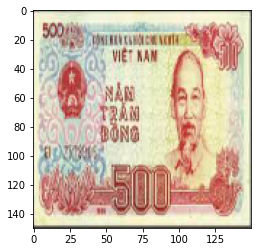

In [ ]:
img=load_img('/content/drive/MyDrive/tri_tue_nhan_tao/money/pred/5001.jpg',target_size=(150,150))
plt.imshow(img)
img=img_to_array(img)
img=img.reshape(1,150,150,3)
img=img.astype('float32')
img/=255
np.argmax(model_food.predict(img),axis=1)[0]
classes[np.argmax(model_food.predict(img),axis=1)[0]]

'500k'

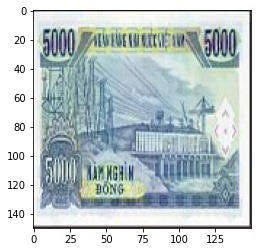

In [ ]:
img=load_img('/content/drive/MyDrive/tri_tue_nhan_tao/money/pred/5k2.jpg',target_size=(150,150))
plt.imshow(img)
img=img_to_array(img)
img=img.reshape(1,150,150,3)
img=img.astype('float32')
img/=255
np.argmax(model_food.predict(img),axis=1)[0]
classes[np.argmax(model_food.predict(img),axis=1)[0]]

'200k'

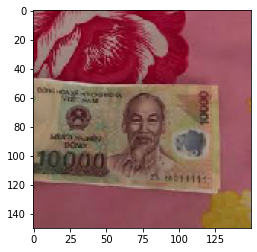

In [ ]:
img=load_img('/content/drive/MyDrive/tri_tue_nhan_tao/money/pred/10k3.jpg',target_size=(150,150))
plt.imshow(img)
img=img_to_array(img)
img=img.reshape(1,150,150,3)
img=img.astype('float32')
img/=255
np.argmax(model_food.predict(img),axis=1)[0]
classes[np.argmax(model_food.predict(img),axis=1)[0]]

'50k'

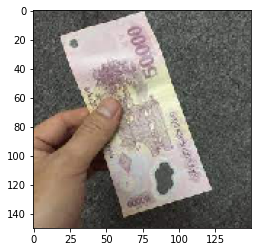

In [ ]:
img=load_img('/content/drive/MyDrive/tri_tue_nhan_tao/money/pred/50k3.jpg',target_size=(150,150))
plt.imshow(img)
img=img_to_array(img)
img=img.reshape(1,150,150,3)
img=img.astype('float32')
img/=255
np.argmax(model_food.predict(img),axis=1)[0]
classes[np.argmax(model_food.predict(img),axis=1)[0]]